### Applying chemical clocks to Kepler exoplanet host stars

There exist abundances of 15 elements for ~1000 Kepler exoplanet host stars published in Brewer & Fischer 2018 from analysis of the California-Kepler Survey spectra (Keck/HIRES). As well, there are isochrone age estimates for these same stars from the CKS group, from Brewer & Fischer 2018, from the Gaia-Kepler Stellar Properties Catalog (Berger et al. 2020), and from other sources if needed (e.g. gyro-kinematic ages using the method Lu et al. 2021 can be determined, or asteroseismic ages for ~30 stars from Silva-Aguirre et al. 2015 exist). There are also independently determined spectroscopic parameters from CKS, Martinez et al. 2019, and Brewer & Fischer 2018 -- all determined from the same spectra. 

There are a number of goals or potential goals to this project (and I need help whittling these down or reframing!):

1. Use calibrated abundance-age relations from the literature to compute independent age estimates from so-called chemical clocks such as [Y/Mg], [Y/Al]. This pre-supposes that these relations hold for the entirety of the CKS sample (a much broader swath of the H-R diagram than where the age-abundance relations were calibrated from). This also pre-supposes that the abundances computed for CKS stars are on the same scale as those used to calibrate age-abundance relations. 


2. Examine how age-abundance relations from established chemical clocks vary across the H-R diagram, and whether the inclusion of additional variables in a regression (such as Teff, logg) can provide more robust ages. So far it appears that established chemical clocks remain sensitive age indicators for stars with temperatures within ~1000 K of the Sun, and are even more sensitive for evolved stars. 


3. Determine the age sensitivity of all available abundance ratios. This pre-supposes that the isochrone ages we have from the literature are reliable. For the hotter stars they should be ~reliable. More broadly, can an optimal combination of abundances be found that maximizes the (absolute value of) the slope of an age-abundance relation relative to the typical precision achieved?


4. Find an age-abundance relation (potentially with additional variables) that accurately describes both a solar twin sample and the CKS sample, allowing for some jitter in the CKS data to get the abundances/ages on the same scale as the solar twins and refine the ages of exoplanet hosts. There may be a variety of methods that could work here and so far I've only explored linear regression. I imagine other models could perform better. In principle this could result in a tool that allows for the age determination of an arbitrary star with 4500 < Teff < 6500 and 3 < logg < 5 and computed abundances. 


5. Compare the abundances and abundance ratios of solar-twin exoplanet host stars with those of solar-twins from the literature. The goal here is to assemble a sample of exoplanet hosts that very closely resemble solar twins (which may or may not host Kepler-type planetary systems) and see how they differ from solar twins in abundance space. Megan has thoughts on how meaningful this comparison is - given that Brewer & Fischer 2018 and the solar twin community determine abundances differently (and potentially from different line lists). So far I have found that for many abundances / abundance ratios the planet host and solar twin distributions are very similar, but in a few elements there are gross offsets (mainly carbon & oxygen) that seem worth noting.


Here's a [link](https://www.overleaf.com/read/ntqqxcvbsnqj) to an Overleaf draft

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from astropy.table import Table
from astropy.table import join

mpl.rcParams["figure.dpi"] = 100

df = pd.read_parquet('./data.parquet')
df.head()

,kepid,kepoi_name,kepler_name,ra,ra_err,ra_str,dec,dec_err,dec_str,koi_gmag,...,bf18_e_[Na/N],bf18_[Na/C],bf18_e_[Na/C],bf18_[O/N],bf18_e_[O/N],bf18_[O/C],bf18_e_[O/C],bf18_[N/C],bf18_e_[N/C],bf18_[alpha/Fe]
0,10797460,K00752.01,Kepler-227 b,291.93423,0.0,19h27m44.22s,48.141651,0.0,+48d08m29.9s,15.890,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
1,10797460,K00752.02,Kepler-227 c,291.93423,0.0,19h27m44.22s,48.141651,0.0,+48d08m29.9s,15.890,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
2,10811496,K00753.01,None,297.00482,0.0,19h48m01.16s,48.134129,0.0,+48d08m02.9s,15.943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10848459,K00754.01,None,285.53461,0.0,19h02m08.31s,48.285210,0.0,+48d17m06.8s,16.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10854555,K00755.01,Kepler-664 b,288.75488,0.0,19h15m01.17s,48.226200,0.0,+48d13m34.3s,16.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe has a row entry for each KOI, meaning individual star are represented N times where N is the number of KOIs detected around that star so we drop duplicates.

In [5]:
print(np.shape(df))
df = df.drop_duplicates(subset=['kepid'], keep='first')
print(np.shape(df))

(8214, 1371)
(8214, 1371)


In [7]:
len(df[np.isfinite(df['bf18_[Fe/H]'])])

1059

In [6]:
for col in df.columns:
    print(col)

kepid
kepoi_name
kepler_name
ra
ra_err
ra_str
dec
dec_err
dec_str
koi_gmag
koi_gmag_err
koi_rmag
koi_rmag_err
koi_imag
koi_imag_err
koi_zmag
koi_zmag_err
koi_jmag
koi_jmag_err
koi_hmag
koi_hmag_err
koi_kmag
koi_kmag_err
koi_kepmag
koi_kepmag_err
koi_delivname
koi_vet_stat
koi_quarters
koi_disposition
koi_pdisposition
koi_count
koi_num_transits
koi_max_sngle_ev
koi_max_mult_ev
koi_bin_oedp_sig
koi_limbdark_mod
koi_ldm_coeff4
koi_ldm_coeff3
koi_ldm_coeff2
koi_ldm_coeff1
koi_trans_mod
koi_model_snr
koi_model_dof
koi_model_chisq
koi_time0bk
koi_time0bk_err1
koi_time0bk_err2
koi_eccen
koi_eccen_err1
koi_eccen_err2
koi_longp
koi_longp_err1
koi_longp_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_sma
koi_sma_err1
koi_sma_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_ingress
koi_ingress_err1
koi_ingress_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_period
koi_period_err1
koi_period_err2
koi_ror
koi_ror_err1
koi_ror_err2
koi_dor
koi_dor_e

### Nissen et al. 2020 solar twin sample

In [23]:
nis_t1 = Table.read("http://cdsarc.unistra.fr/ftp/J/A+A/640/A81/table1.dat",
                readme="http://cdsarc.unistra.fr/ftp/J/A+A/640/A81/ReadMe",
                format="ascii.cds")

nis_t2 = Table.read("http://cdsarc.unistra.fr/ftp/J/A+A/640/A81/table2.dat",
                readme="http://cdsarc.unistra.fr/ftp/J/A+A/640/A81/ReadMe",
                format="ascii.cds")

nis = join(nis_t1,nis_t2)

nis['ymg_ratio'] = nis['[Y/Fe]'] - nis['[Mg/Fe]']
nis['yal_ratio'] = nis['[Y/Fe]'] - nis['[Al/Fe]']

nis = nis.to_pandas()
nis = nis.replace(9.999, np.nan)

nis.head()

,HD,Teff,logg-sp,Vturb,[Fe/H],[alpha/Fe],Zs,logL,Age,e_Age,...,[Al/Fe],[Si/Fe],[Ca/Fe],[Ti/Fe],[Cr/Fe],[Ni/Fe],[Sr/Fe],[Y/Fe],ymg_ratio,yal_ratio
0,361,5892,4.524,1.05,-0.130,-0.003,0.0135,-0.021,1.5,0.9,...,-0.042,-0.013,0.027,0.019,0.002,-0.056,0.106,0.079,0.093,0.121
1,1461,5760,4.372,1.03,0.190,0.009,0.0275,0.077,5.5,0.5,...,0.044,0.014,-0.016,0.007,0.005,0.045,-0.052,-0.039,-0.046,-0.083
2,2071,5724,4.486,0.96,-0.087,0.013,0.0152,-0.076,4.1,0.9,...,-0.001,0.002,0.024,0.029,0.005,-0.029,0.032,0.039,0.038,0.040
3,4915,5662,4.513,0.93,-0.212,0.042,0.0121,-0.154,3.8,1.3,...,0.020,0.014,0.045,0.064,0.006,-0.037,0.036,0.032,-0.016,0.012
4,6204,5857,4.517,1.05,0.046,-0.038,0.0188,-0.034,-0.4,1.0,...,-0.078,-0.044,0.019,-0.009,0.005,-0.064,0.129,0.122,0.184,0.200


In [24]:
for col in nis.columns:
    print(col)

HD
Teff
logg-sp
Vturb
[Fe/H]
[alpha/Fe]
Zs
logL
Age
e_Age
Mass
logg-ph
Ys
[C/Fe]
[O/Fe]
[Na/Fe]
[Mg/Fe]
[Al/Fe]
[Si/Fe]
[Ca/Fe]
[Ti/Fe]
[Cr/Fe]
[Ni/Fe]
[Sr/Fe]
[Y/Fe]
ymg_ratio
yal_ratio


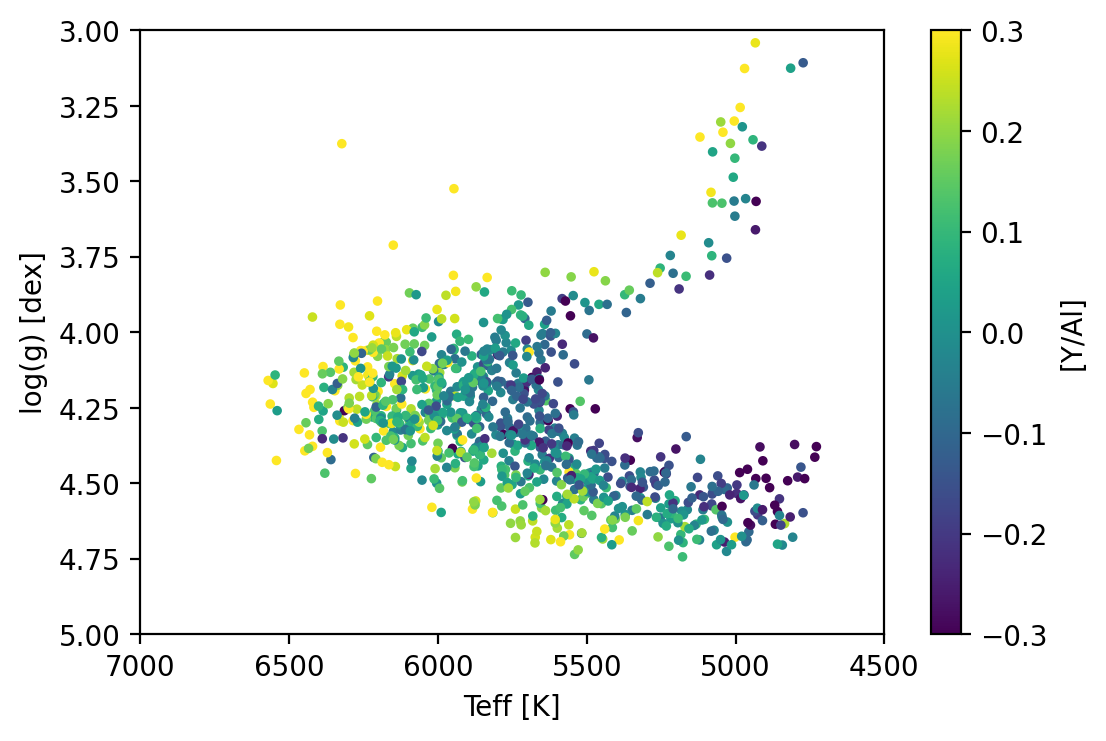

In [25]:
sc_kws = {'s':6, 'cmap': 'viridis'}

cks_teff = df['p20_cks_steff']
cks_logg = df['p20_cks_slogg']
cks_feh  = df['p20_cks_smet']
cks_age  = df['cks_age']

bf_teff = df['bf18_Teff']
bf_logg = df['bf18_log(g)']
bf_feh  = df['bf18_[Fe/H]']
bf_age  = df['bf18_Age']

yal = df["bf18_[Y/Al]"]
ymg = df["bf18_[Y/Mg]"]

plt.scatter(cks_teff, cks_logg, c=yal, vmin=-0.3, vmax=0.3, **sc_kws)
plt.xlim(7000,4500)
plt.ylim(5,3)
plt.colorbar(label='[Y/Al]')
plt.xlabel('Teff [K]')
plt.ylabel('log(g) [dex]')
plt.show()

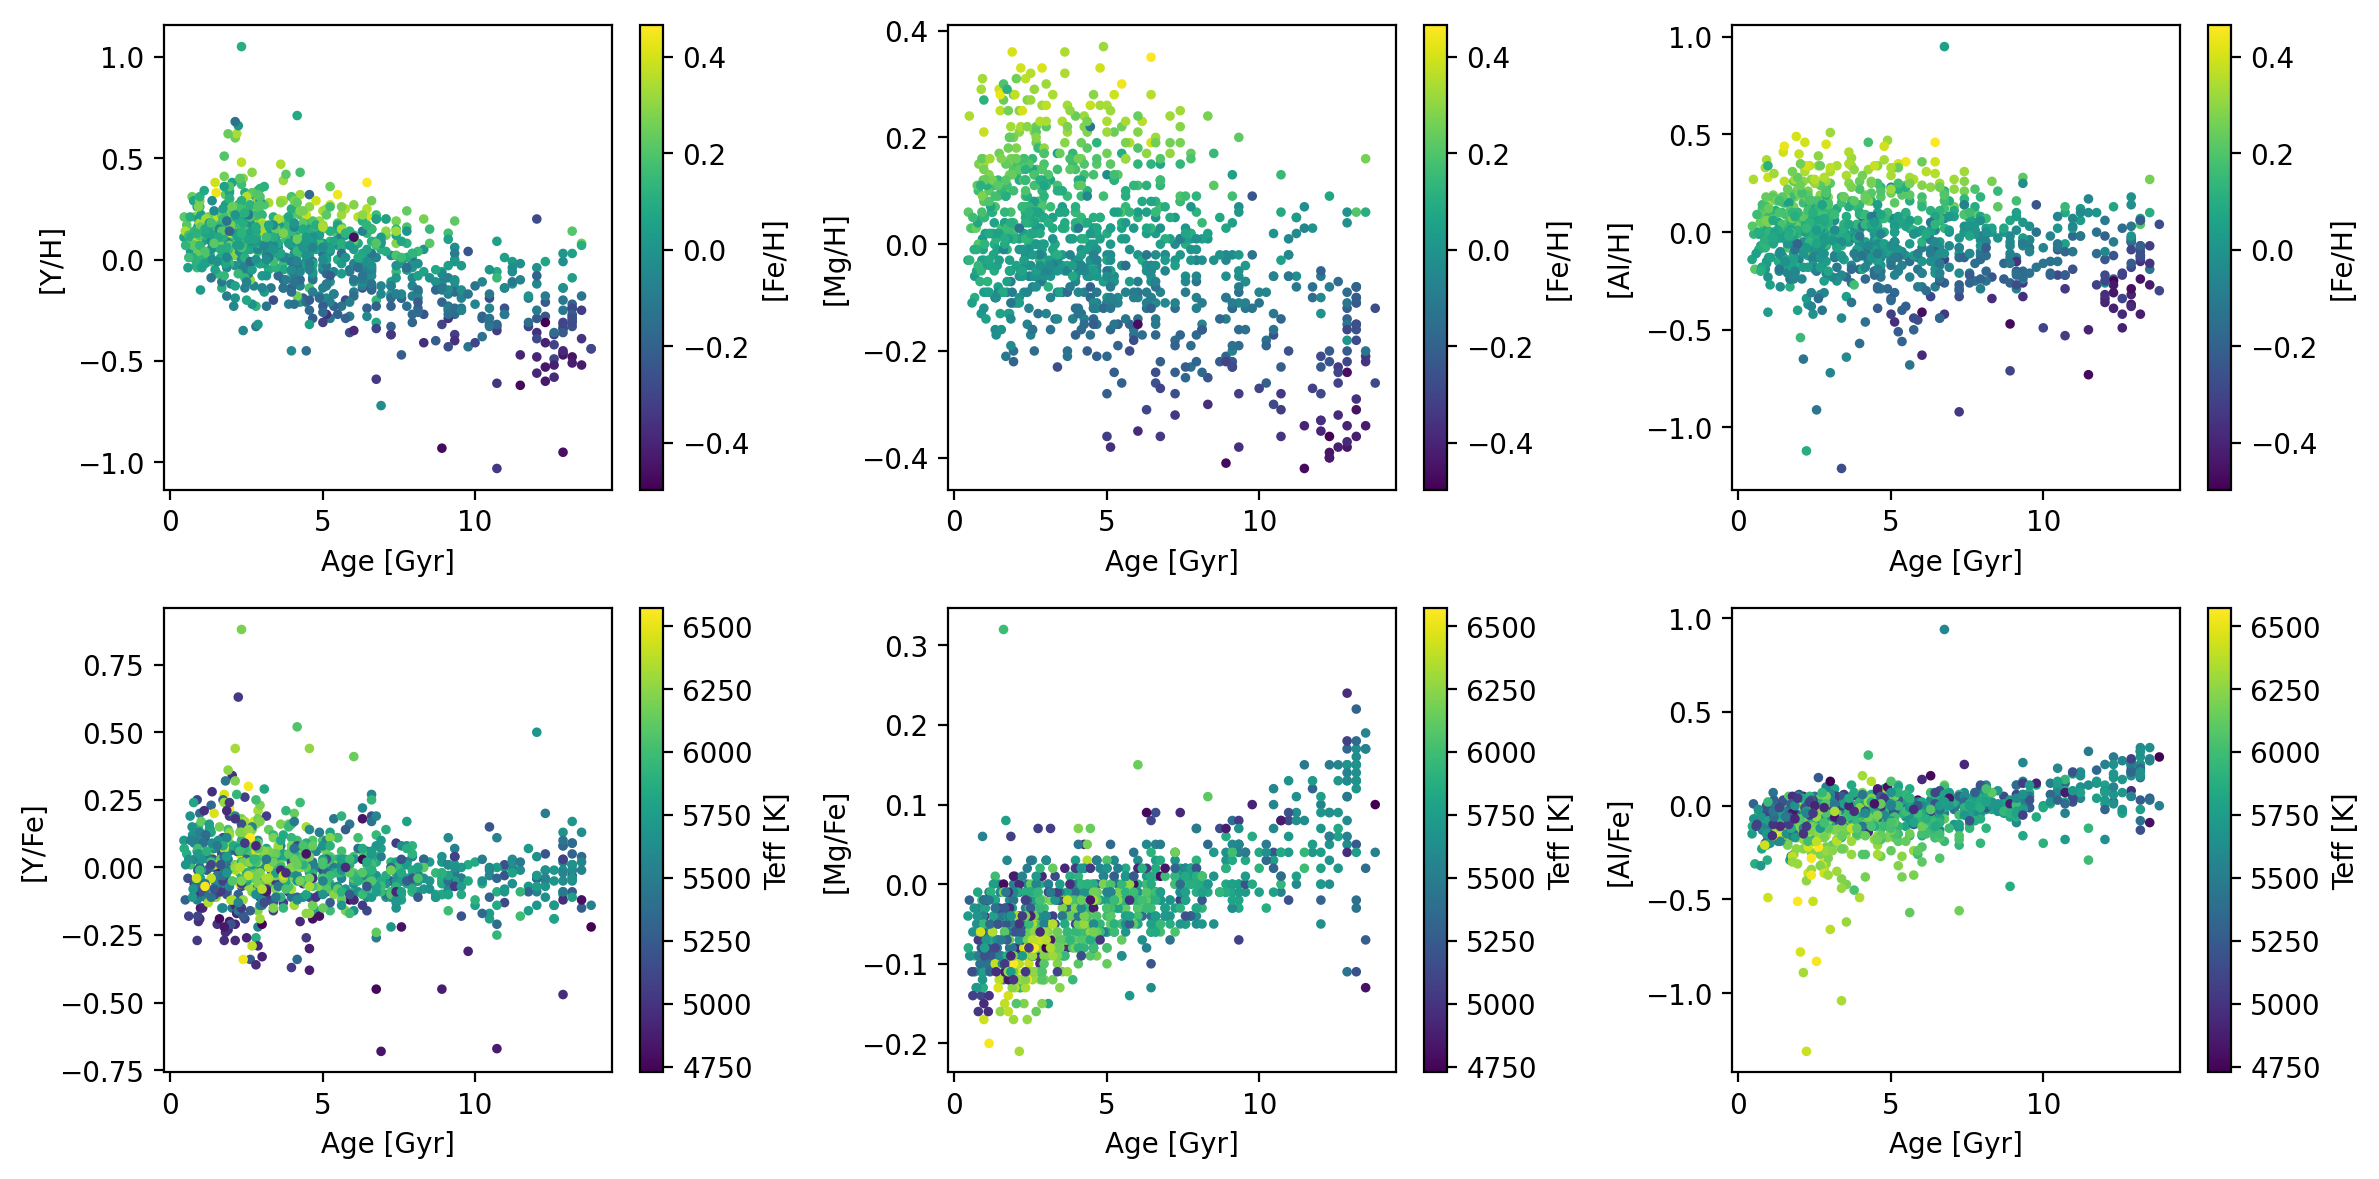

In [26]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(12,6))

for i,el in enumerate(['Y','Mg','Al']):
    sc = ax[0][i].scatter(cks_age, df['bf18_['+el+'/H]'], c=cks_feh, **sc_kws)
    ax[0][i].set_ylabel('['+el+'/H]')
    ax[0][i].set_xlabel('Age [Gyr]')
    cb = fig.colorbar(sc, ax=ax[0][i])
    cb.set_label('[Fe/H]')
    
    sc = ax[1][i].scatter(cks_age, df['bf18_['+el+'/Fe]'], c=cks_teff, **sc_kws)
    ax[1][i].set_ylabel('['+el+'/Fe]')
    ax[1][i].set_xlabel('Age [Gyr]')    
    cb = fig.colorbar(sc, ax=ax[1][i])
    cb.set_label('Teff [K]')
    
    
plt.tight_layout()

### CKS sample: Linear regression with abundances normalized to H

Adjusted R-squared: 0.4605401081347711
Feature: 0, Score: -24.10096 [Fe/H]
Feature: 1, Score: -11.15745 [Ti/H]
Feature: 2, Score: -6.61258 [Y/H]
Feature: 3, Score: -1.18567 [N/H]
Feature: 4, Score: -0.44725 [C/H]
Feature: 5, Score: -0.17119 [Ni/H]
Feature: 6, Score: -0.14654 [Cr/H]
Feature: 7, Score: 0.24702 [O/H]
Feature: 8, Score: 1.63691 [V/H]
Feature: 9, Score: 2.80421 [Al/H]
Feature: 10, Score: 3.68978 [Na/H]
Feature: 11, Score: 4.01232 [Ca/H]
Feature: 12, Score: 4.40547 [Si/H]
Feature: 13, Score: 7.56810 [Mn/H]
Feature: 14, Score: 14.58439 [Mg/H]


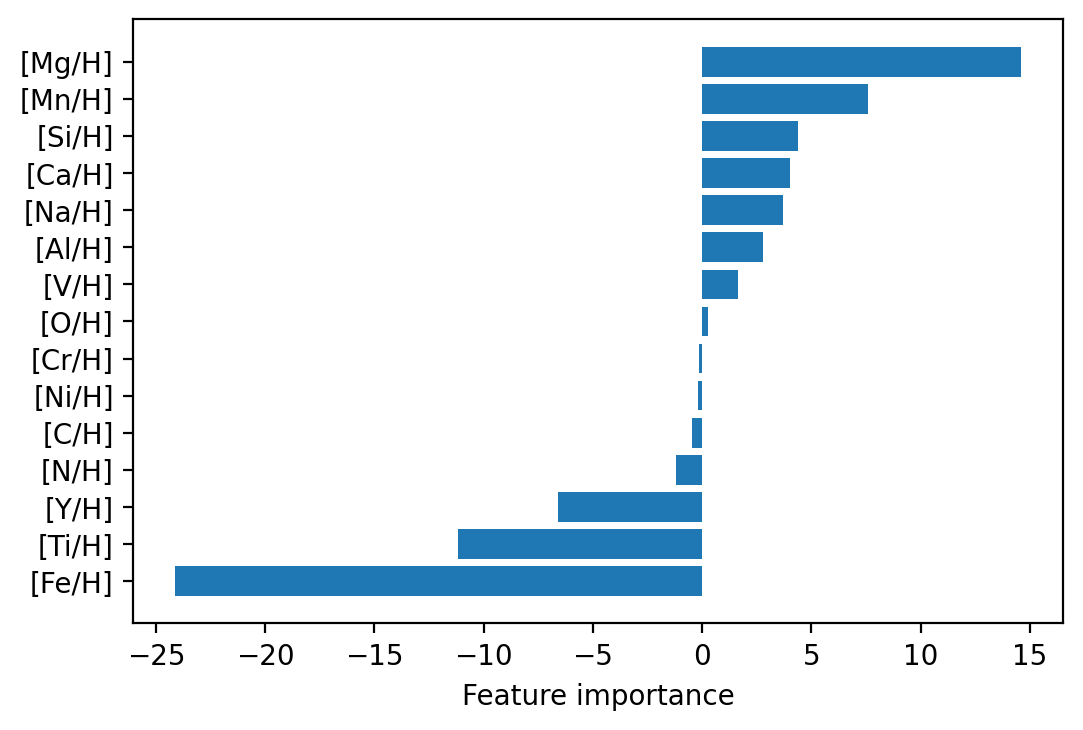

In [27]:
#Drop NaNs
df = df[df['bf18_Age'].notna()]
df = df[df['cks_age'].notna()]

from sklearn.linear_model import LinearRegression

regression_cols = []

#regression_cols.append("bf18_Teff")
#regression_cols.append("bf18_log(g)")

for col in df.columns:
    if ("bf18_[" in col) & ("/H]" in col) & (col!="bf18_[M/H]"):
        regression_cols.append(col)

regression_cols = np.array(regression_cols)
regressor_labels = [s.split("bf18_")[1] for s in regression_cols]
regressor_labels = np.array(regressor_labels)


#There are some pretty significant outliers which screw up the regression. Let's remove those.
for col in regression_cols:
    df = df[abs(df[col])<3]


model = LinearRegression()
X, y = df[regression_cols], df.bf18_Age
model.fit(X, y)

#Adjusted R-squared
print('Adjusted R-squared:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

# Get importance
importance = model.coef_
order = np.argsort(importance)
importance = importance[order]
regressor_labels = regressor_labels[order]

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), regressor_labels[i])
# Plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(np.arange(len(importance)), regressor_labels)
plt.xlabel("Feature importance")
plt.show()

### CKS sample: Linear regression with abundances normalized to Fe

Adjusted R-squared: 0.5667187772183608
Feature: 0, Score: -9.89240
Feature: 1, Score: -6.04765
Feature: 2, Score: -2.48088
Feature: 3, Score: -2.31454
Feature: 4, Score: -0.31887
Feature: 5, Score: 0.23307
Feature: 6, Score: 0.58760
Feature: 7, Score: 0.78426
Feature: 8, Score: 0.94282
Feature: 9, Score: 2.25067
Feature: 10, Score: 3.05476
Feature: 11, Score: 3.24844
Feature: 12, Score: 3.40676
Feature: 13, Score: 4.19165
Feature: 14, Score: 7.07803
Feature: 15, Score: 7.97780


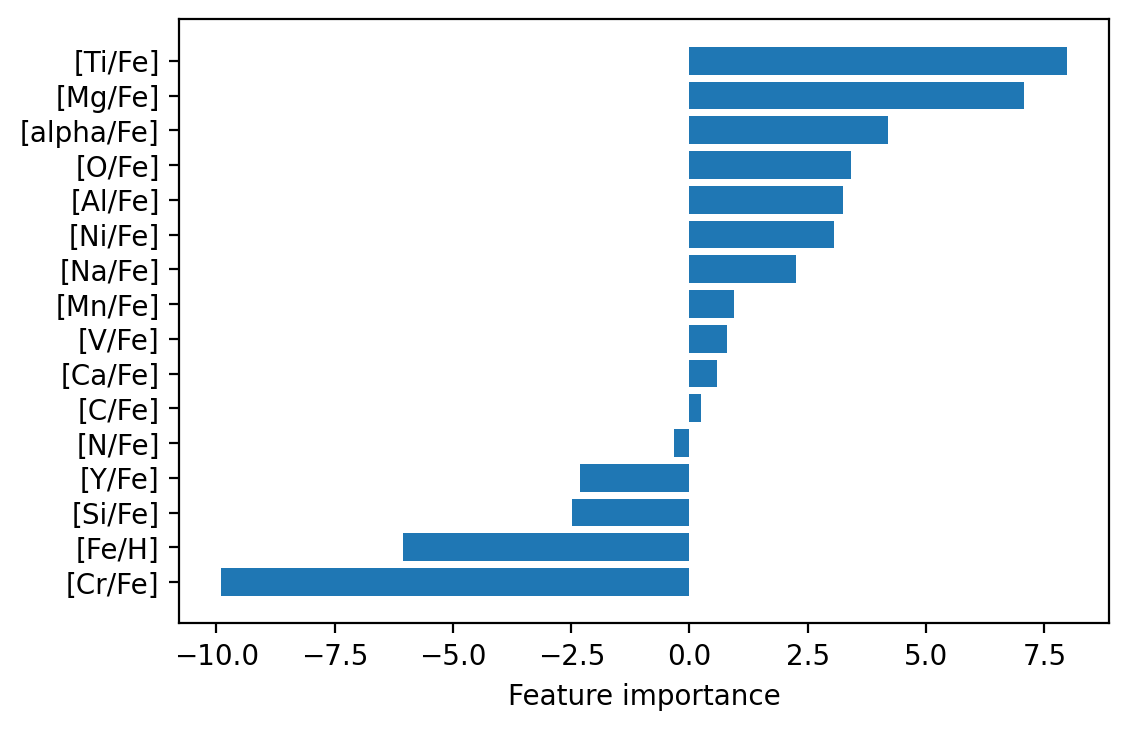

In [34]:
regression_cols = []
#regression_cols.append("bf18_Teff")
#regression_cols.append("bf18_log(g)")

for col in df.columns:
    if ("bf18_[" in col) & ("/Fe]" in col) & (col!="bf18_[M/H]"):
        regression_cols.append(col)

        
regression_cols.append("bf18_[Fe/H]")
regression_cols = np.array(regression_cols)
regressor_labels = [s.split("bf18_")[1] for s in regression_cols]
regressor_labels = np.array(regressor_labels)

#There are some pretty significant outliers which screw up the regression. Let's remove those.
for col in regression_cols:
    df = df[abs(df[col])<3]

model = LinearRegression()
X, y = df[regression_cols], df.cks_age
model.fit(X, y)

#Adjusted R-squared
print('Adjusted R-squared:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

# Get importance
importance = model.coef_

order = np.argsort(importance)
importance = importance[order]
regressor_labels = regressor_labels[order]

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(np.arange(len(importance)), regressor_labels)
plt.xlabel("Feature importance")
plt.show()

### Normalized to Mg

Adjusted R-squared: 0.5386239906178256
Feature: 0, Score: -16.90109
Feature: 1, Score: -6.57170
Feature: 2, Score: -3.81141
Feature: 3, Score: -2.83155
Feature: 4, Score: -1.13720
Feature: 5, Score: 0.10397
Feature: 6, Score: 1.16454
Feature: 7, Score: 2.10554
Feature: 8, Score: 3.80273
Feature: 9, Score: 9.78983


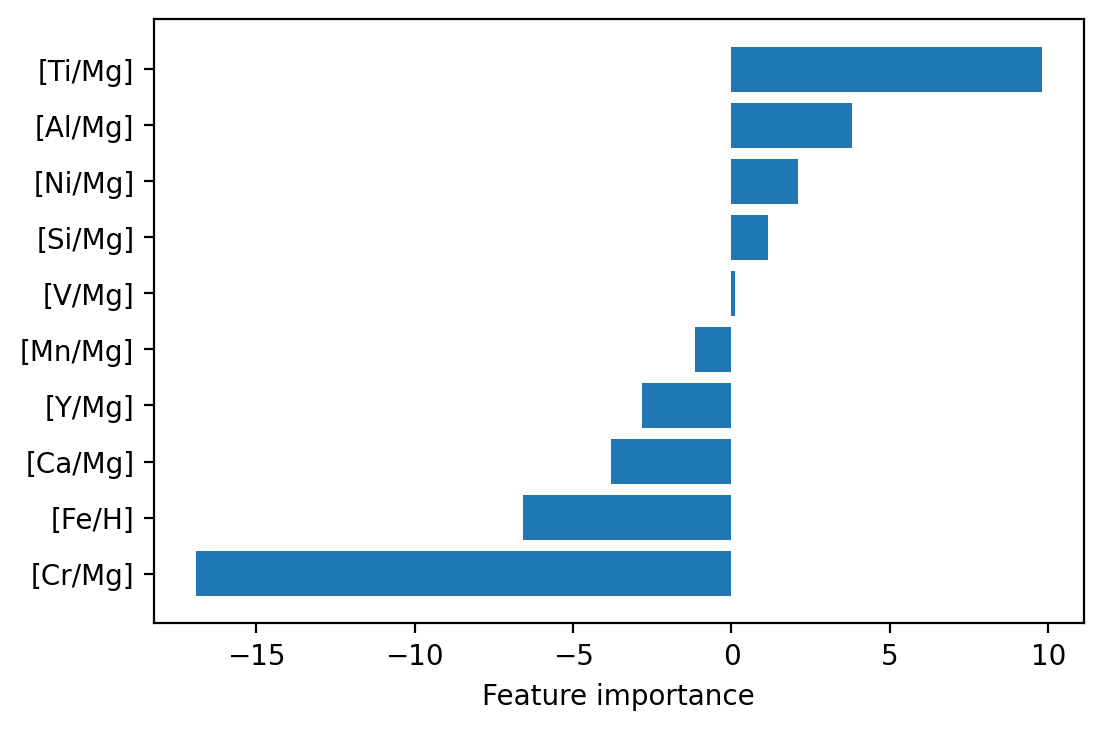

In [35]:
regression_cols = []
#regression_cols.append("bf18_Teff")
#regression_cols.append("bf18_log(g)")

for col in df.columns:
    if ("bf18_[" in col) & ("/Mg]" in col) & (col!="bf18_[M/H]"):
        regression_cols.append(col)

        
regression_cols.append("bf18_[Fe/H]")
regression_cols = np.array(regression_cols)
regressor_labels = [s.split("bf18_")[1] for s in regression_cols]
regressor_labels = np.array(regressor_labels)

#There are some pretty significant outliers which screw up the regression. Let's remove those.
for col in regression_cols:
    df = df[abs(df[col])<3]

model = LinearRegression()
X, y = df[regression_cols], df.cks_age
model.fit(X, y)

#Adjusted R-squared
print('Adjusted R-squared:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

# Get importance
importance = model.coef_

order = np.argsort(importance)
importance = importance[order]
regressor_labels = regressor_labels[order]

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(np.arange(len(importance)), regressor_labels)
plt.xlabel("Feature importance")
plt.show()

### Solar twin sample: linear regression with abundances normalized to Fe

Adjusted R-squared: 0.9253398951395866
Feature: 0, Score: -80.29929
Feature: 1, Score: -62.33806
Feature: 2, Score: -53.88648
Feature: 3, Score: -46.55329
Feature: 4, Score: -18.50699
Feature: 5, Score: -6.06396
Feature: 6, Score: 3.13316
Feature: 7, Score: 5.16414
Feature: 8, Score: 15.17887
Feature: 9, Score: 16.94428
Feature: 10, Score: 41.66162
Feature: 11, Score: 50.73940
Feature: 12, Score: 60.95894


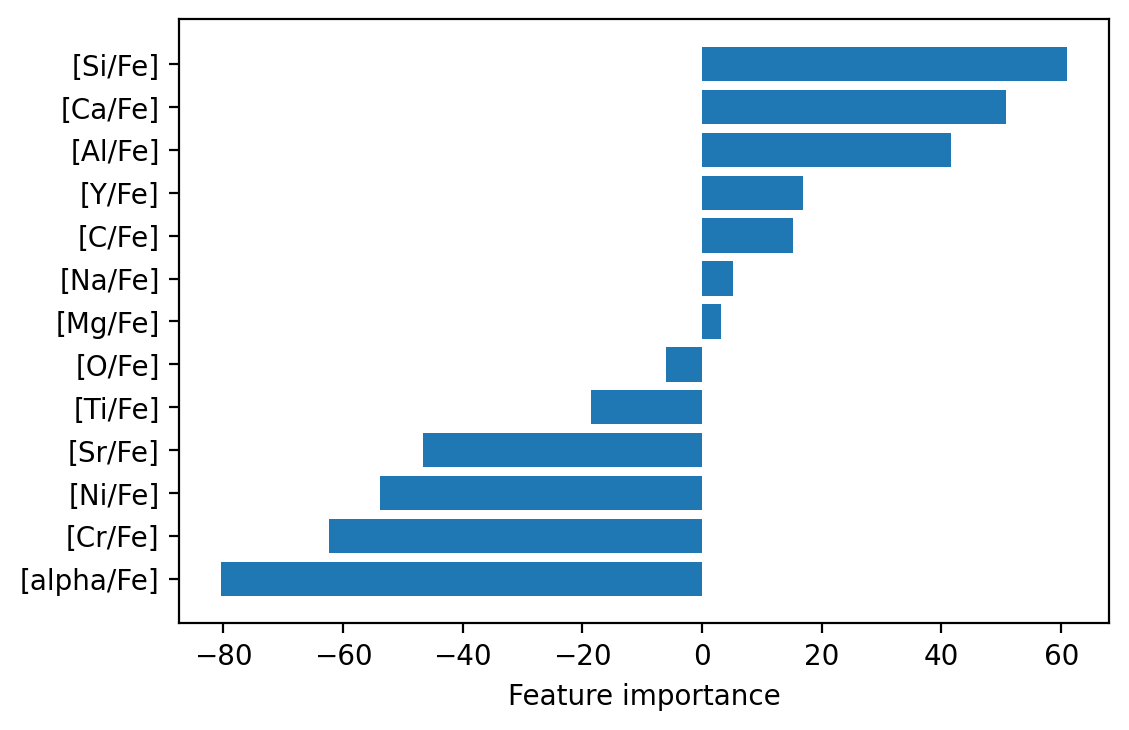

In [29]:
regression_cols = []

for col in nis.columns:
    if ("/Fe" in col):
        regression_cols.append(col)

regression_cols = np.array(regression_cols)
regressor_labels = [s for s in regression_cols]
regressor_labels = np.array(regressor_labels)

#There are some pretty significant outliers which screw up the regression. Let's remove those.
for col in regression_cols:
    nis = nis[abs(nis[col])<3]

model = LinearRegression()
X, y = nis[regression_cols], nis.Age
model.fit(X, y)

#Adjusted R-squared
print('Adjusted R-squared:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

# Get importance
importance = model.coef_

order = np.argsort(importance)
importance = importance[order]
regressor_labels = regressor_labels[order]

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(np.arange(len(importance)), regressor_labels)
plt.xlabel("Feature importance")
plt.show()

### Linear regression with all abundances and abundance ratios

Adjusted R-squared: 0.5104832662269243


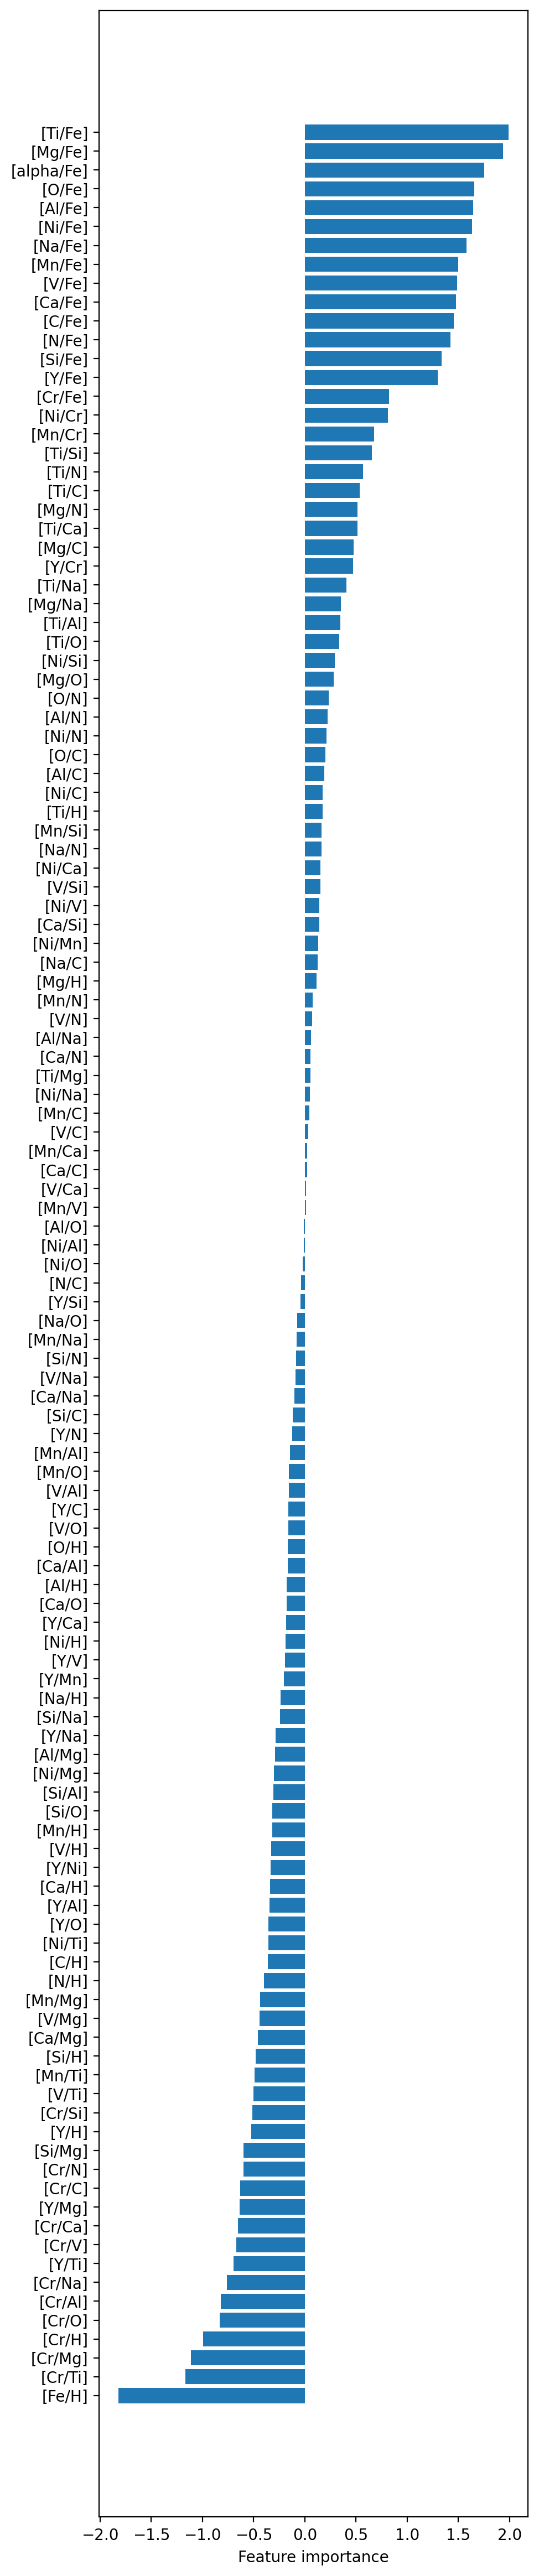

In [30]:
regression_cols = []

for col in df.columns:
    if ("bf18_[" in col) & (col!="bf18_[M/H]"): #& ('/Fe]' not in col): #& ('/H]' not in col):
        regression_cols.append(col)

regression_cols = np.array(regression_cols)
regressor_labels = [s.split("bf18_")[1] for s in regression_cols]
regressor_labels = np.array(regressor_labels)

#There are some pretty significant outliers which screw up the regression. Let's remove those.
for col in regression_cols:
    df = df[abs(df[col])<3]

model = LinearRegression()
X, y = df[regression_cols], df.cks_age
model.fit(X, y)

#Adjusted R-squared
print('Adjusted R-squared:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

# Get importance
importance = model.coef_
order = np.argsort(importance)
importance = importance[order]
regressor_labels = regressor_labels[order]

# Summarize feature importance
#for i,v in enumerate(importance):
#    print(regressor_labels[i], 'Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
#ax.barh(y_pos, performance, xerr=error, align='center')

plt.barh([x for x in range(len(importance))], importance)
plt.yticks(np.arange(len(importance)), regressor_labels)
plt.xlabel("Feature importance")
plt.gcf().set_size_inches(5,30)
plt.show()

In [31]:
#Print features in order of absolute importance
order = np.argsort(abs(importance))[::-1]

for i in range(len(importance)):
    print(regressor_labels[order][i], importance[order][i])

[Ti/Fe] 1.9896539896040215
[Mg/Fe] 1.933418557136007
[Fe/H] -1.8182151535613724
[alpha/Fe] 1.7530196887389344
[O/Fe] 1.65315937420995
[Al/Fe] 1.6432643253865895
[Ni/Fe] 1.631159160163529
[Na/Fe] 1.580904083723006
[Mn/Fe] 1.4991628860462383
[V/Fe] 1.4892534269376976
[Ca/Fe] 1.4769617736948826
[C/Fe] 1.45480374698373
[N/Fe] 1.4203074445979262
[Si/Fe] 1.3359865194767728
[Y/Fe] 1.2955778973097833
[Cr/Ti] -1.1676918103465965
[Cr/Mg] -1.1114563778785818
[Cr/H] -0.9962529743039515
[Cr/O] -0.8311971949525241
[Cr/Fe] 0.8219621792574261
[Cr/Al] -0.8213021461291629
[Ni/Cr] 0.8091969809061019
[Cr/Na] -0.7589419044655801
[Y/Ti] -0.6940760922942366
[Mn/Cr] 0.6772007067888138
[Cr/V] -0.6672912476802719
[Cr/Ca] -0.6549995944374568
[Ti/Si] 0.6536674701272479
[Y/Mg] -0.6378406598262245
[Cr/C] -0.6328415677263054
[Cr/N] -0.5983452653404999
[Si/Mg] -0.5974320376592334
[Ti/N] 0.5693465450060944
[Ti/C] 0.5348502426202921
[Y/H] -0.5226372562515927
[Cr/Si] -0.5140243402193488
[Mg/N] 0.5131111125380801
[Ti/Ca]

### Fitting a multivariate relation to the solar twin sample and CKS sample allowing for offsets in CKS data

In [32]:
#This definition of "Sun-like" comes from Nissen et al. 2020
n20_sun_like = (df.cks_Teff>5600)&(df.cks_Teff<5950)&\
               (df.p20_cks_slogg>4.2)&(df.p20_cks_slogg<4.53)&\
               (df['cks_[Fe/H]']>-0.3)&(df['cks_[Fe/H]']<0.3)

arg = n20_sun_like &\
     (np.isfinite(df["p20_cks_steff"])) &\
     (df["p20_cks_slogg"]) &\
     (df["p20_cks_smet"]) &\
     (df["cks_age"])

#Revised 8/27/2021
#Combined CKS + Nissen et al. 2020 data sets
# data = dict(y=np.append(nis["[Y/Fe]"]-nis["[Mg/Fe]"], df["ymg_ratio"][arg]), yerr=np.append(0.02*np.ones(len(nis)), df["ymg_ratio_err"][arg]),
#             x1=np.append(nis["Teff"], df["p20_cks_steff"][arg]), x1err=np.append(10.*np.ones(len(nis)), df["p20_cks_steff_err1"][arg]),
#             x2=np.append(nis["logg-sp"], df["p20_cks_slogg"][arg]), x2err=np.append(0.02*np.ones(len(nis)), df["p20_cks_slogg_err1"][arg]), 
#             x3=np.append(nis["[Fe/H]"], df["p20_cks_smet"][arg]), x3err=np.append(0.01*np.ones(len(nis)), df["p20_cks_smet_err1"][arg]),
#             x4=np.append(nis["Age"], df["cks_age"][arg]), x4err=np.append(nis["e_Age"], np.max([df["cks_e_age"][arg],df["cks_E_age"][arg]], axis=0)),
#             flag=np.append(['n20']*len(nis), ['cks']*len(df["cks_age"][arg])))

# data = dict(y=np.append(nis["[Y/Fe]"]-nis["[Mg/Fe]"], df["bf18_[Y/Mg]"][arg]), yerr=np.append(0.02*np.ones(len(nis)), df["bf18_e_[Y/Mg]"][arg]),
#             teff=np.append(nis["Teff"], df["p20_cks_steff"][arg]), eteff=np.append(10.*np.ones(len(nis)), df["p20_cks_steff_err1"][arg]),
#             logg=np.append(nis["logg-sp"], df["p20_cks_slogg"][arg]), elogg=np.append(0.02*np.ones(len(nis)), df["p20_cks_slogg_err1"][arg]), 
#             feh=np.append(nis["[Fe/H]"], df["p20_cks_smet"][arg]), efeh=np.append(0.01*np.ones(len(nis)), df["p20_cks_smet_err1"][arg]),
#             age=np.append(nis["Age"], df["cks_age"][arg]), eage=np.append(nis["e_Age"], np.max([df["cks_e_age"][arg],df["cks_E_age"][arg]], axis=0)),
#             flag=np.append(['n20']*len(nis), ['cks']*len(df["cks_age"][arg])))


#Reframing in terms of age
#age_ref = "bf18_Age"

source='spocs'

if source=='cks':
    data = dict(ymg=np.append(nis["[Y/Fe]"]-nis["[Mg/Fe]"], df["bf18_[Y/Mg]"][arg]), e_ymg=np.append(0.02*np.ones(len(nis)), df["bf18_e_[Y/Mg]"][arg]),
                yal=np.append(nis["[Y/Fe]"]-nis["[Al/Fe]"], df["bf18_[Y/Al]"][arg]), e_yal=np.append(0.02*np.ones(len(nis)), df["bf18_e_[Y/Al]"][arg]),
                teff=np.append(nis["Teff"], df["p20_cks_steff"][arg]), e_teff=np.append(10.*np.ones(len(nis)), df["p20_cks_steff_err1"][arg]),
                logg=np.append(nis["logg-sp"], df["p20_cks_slogg"][arg]), e_logg=np.append(0.02*np.ones(len(nis)), df["p20_cks_slogg_err1"][arg]), 
                feh=np.append(nis["[Fe/H]"], df["p20_cks_smet"][arg]), e_feh=np.append(0.01*np.ones(len(nis)), df["p20_cks_smet_err1"][arg]),
                age=np.append(nis["Age"], df["cks_age"][arg]), e_age=np.append(nis["e_Age"], np.max([df["cks_e_Age"][arg], df["cks_E_Age"][arg]], axis=0)),
                flag=np.append(['n20']*len(nis), ['cks']*len(df["cks_age"][arg])))
    
elif source=='spocs':
    data = dict(ymg=np.append(nis["[Y/Fe]"]-nis["[Mg/Fe]"], df["bf18_[Y/Mg]"][arg]), e_ymg=np.append(0.02*np.ones(len(nis)), df["bf18_e_[Y/Mg]"][arg]),
            yal=np.append(nis["[Y/Fe]"]-nis["[Al/Fe]"], df["bf18_[Y/Al]"][arg]), e_yal=np.append(0.02*np.ones(len(nis)), df["bf18_e_[Y/Al]"][arg]),
            teff=np.append(nis["Teff"], df["bf18_Teff"][arg]), e_teff=np.append(10.*np.ones(len(nis)), df["bf18_e_Teff"][arg]),
            logg=np.append(nis["logg-sp"], df["bf18_log(g)"][arg]), e_logg=np.append(0.02*np.ones(len(nis)), df["bf18_e_log(g)"][arg]), 
            feh=np.append(nis["[Fe/H]"], df["bf18_[Fe/H]"][arg]), e_feh=np.append(0.01*np.ones(len(nis)), df["bf18_e_[Fe/H]"][arg]),
            age=np.append(nis["Age"], df["bf18_Age"][arg]), e_age=np.append(nis["e_Age"], np.max([df["bf18_e_Age"][arg], df["bf18_E_Age"][arg]], axis=0)),
            flag=np.append(['n20']*len(nis), ['cks']*len(df["bf18_Age"][arg])))

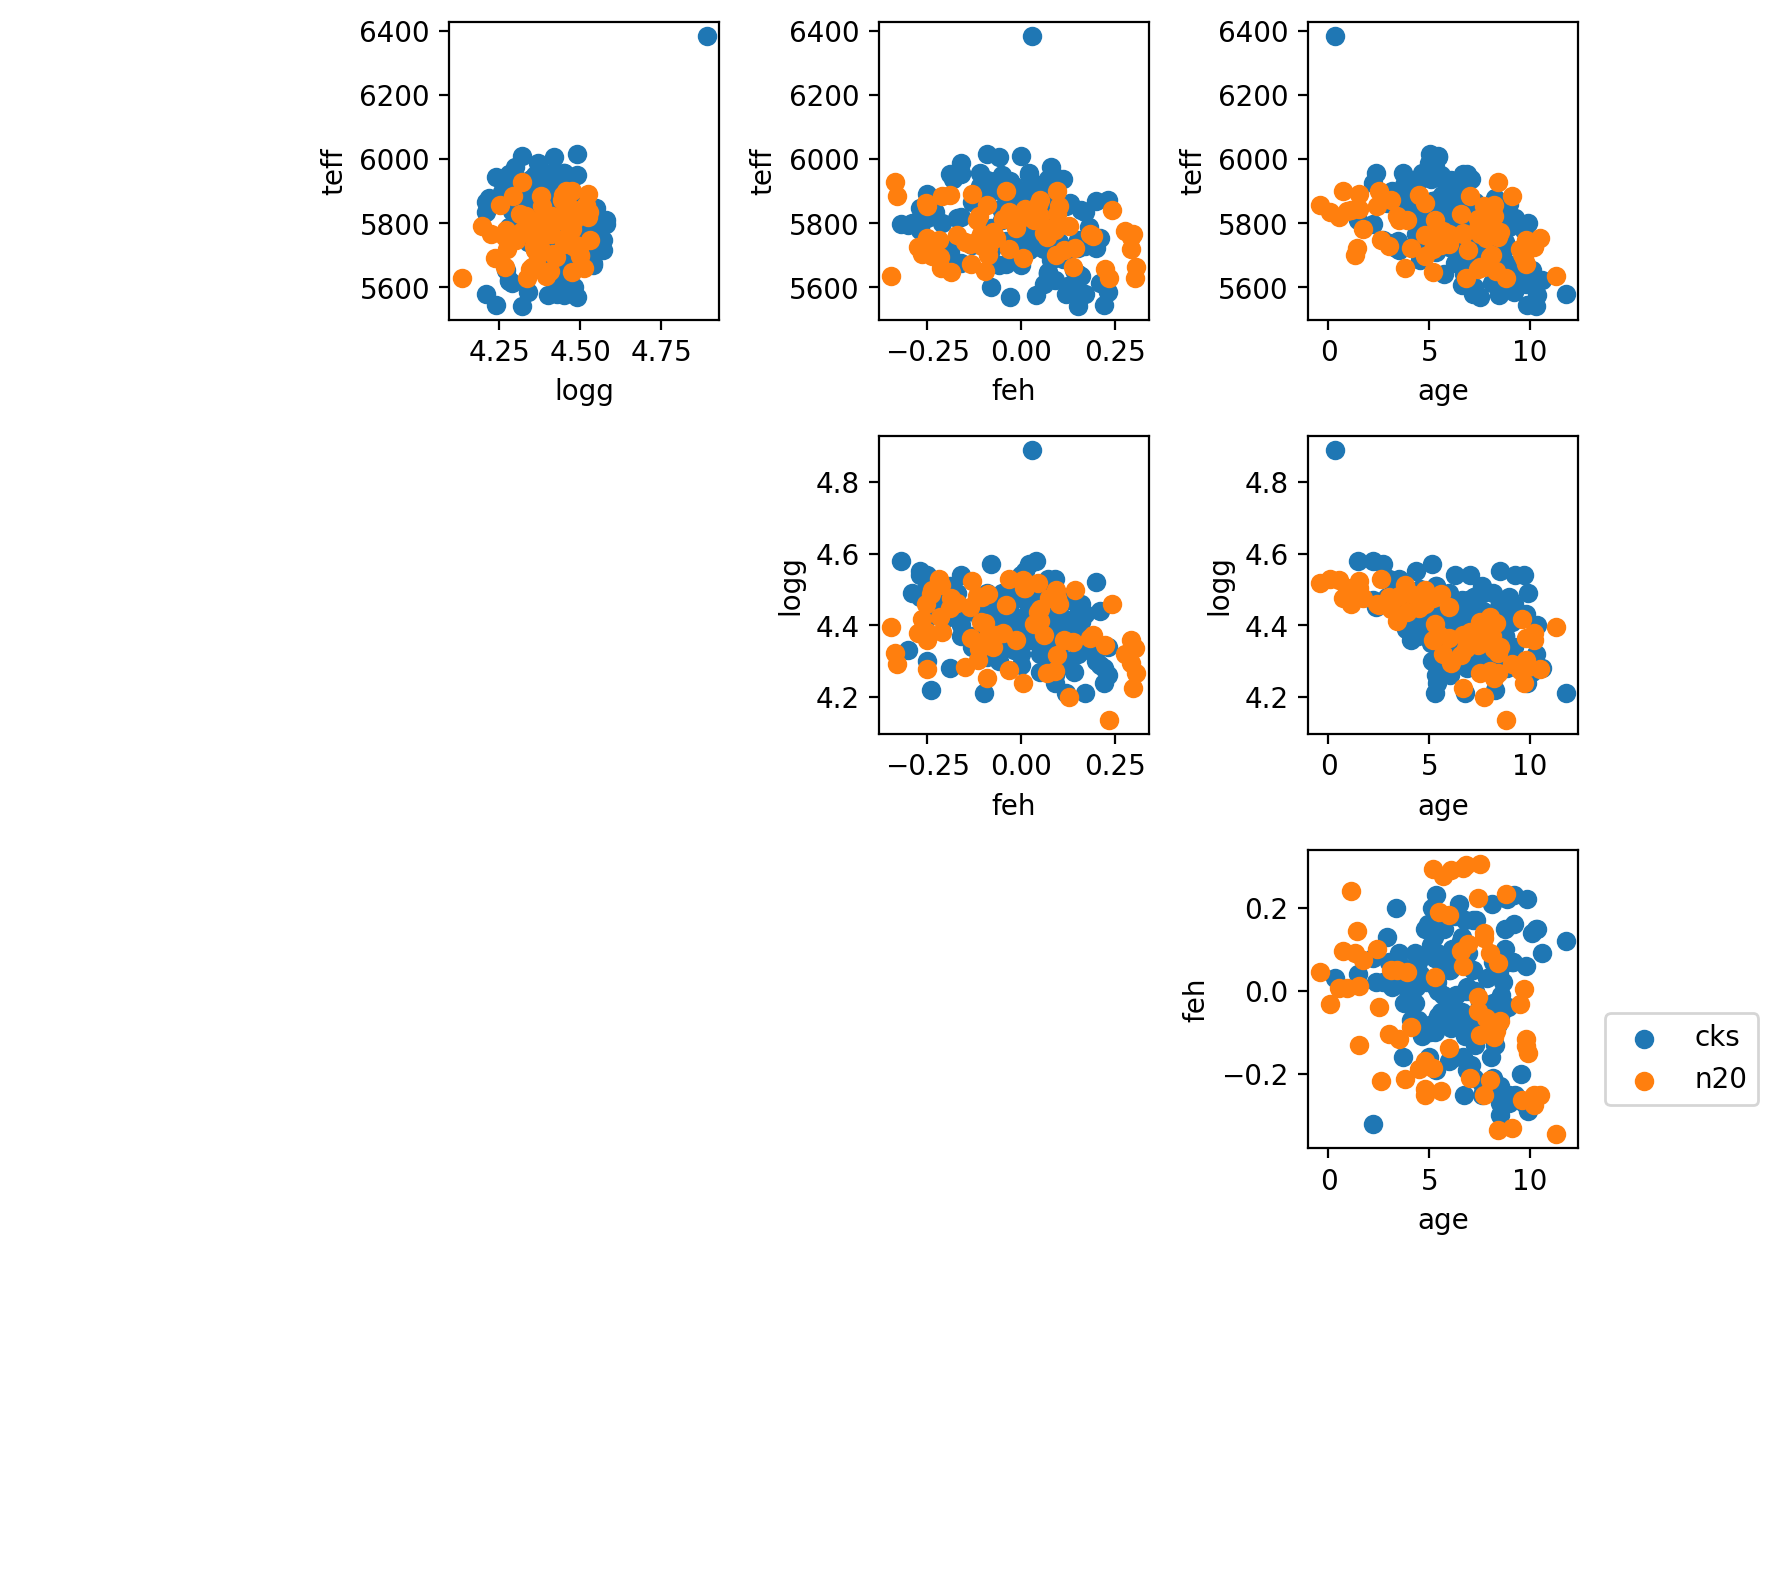

In [33]:
var = ['teff', 'logg', 'feh', 'age']

fig, ax = plt.subplots(nrows=len(var), ncols=len(var), figsize=(9,8))

for i in range(len(var)):
    v1 = var[i]
    for j in range(len(var)):
        v2 = var[j]
        
        for ref in np.unique(data["flag"]):
            arg = data['flag'] == ref
            
            x = data[v1][arg]
            y = data[v2][arg]
        
            if i>j:
                ax[j][i].scatter(x, y, label=ref)
                ax[j][i].set_xlabel(v1)
                ax[j][i].set_ylabel(v2)
            else:
                ax[j][i].axis('off')
        
        
ax[2][3].legend(bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()

In [116]:
#import theano
import pymc3 as pm
import pymc3_ext as pmx
import aesara_theano_fallback.tensor as tt
import exoplanet as xo

print(pm.__version__)
print(xo.__version__)


with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma_jit = pm.HalfCauchy("sigma_jit", beta=10, testval=1.0)
    sigma = pm.Deterministic("sigma", ((sigma_jit**2 + data["e_ymg"]**2))**0.5 )
        
    cks_c0 = pm.Normal("cks_c0", 0, sigma=20, testval=0)
    cks_c1 = pm.Normal("cks_c1", 0, sigma=20, testval=0)
    cks_trend = pm.Deterministic("cks_trend", cks_c0 * (data["flag"]=='cks') + cks_c1 * data["age"] * (data["flag"]=='cks'))
    
    theta0 = pm.Normal("theta0", 0, sigma=20, testval=0)        
    theta_teff = pm.Normal("theta_teff", 0, sigma=20)
    #theta_teff2 = pm.Normal("theta_teff2", 0, sigma=20)
    theta_logg = pm.Normal("theta_logg", 0, sigma=20)
    #theta_logg2 = pm.Normal("theta_logg2", 0, sigma=20)
    theta_feh  = pm.Normal("theta_feh", 0, sigma=20)
    theta_feh2  = pm.Normal("theta_feh2", 0, sigma=20)
    theta_age  = pm.Normal("theta_age", 0, sigma=20)
     
    teff_trend = pm.Deterministic("teff_trend", theta_teff*data["teff"])
    logg_trend = pm.Deterministic("logg_trend", theta_logg*data["logg"])
    feh_trend  = pm.Deterministic("feh_trend", theta_feh*data["feh"] + theta_feh2*data["feh"]**2)
    age_trend  = pm.Deterministic("age_trend", theta_age*data["age"])

    ymodel = pm.Deterministic("ymodel", 
                              theta0 + teff_trend + logg_trend + feh_trend + age_trend)    
    
    others = pm.Deterministic("others",
                              theta0 + teff_trend + logg_trend + feh_trend)
    
    #trend1 = pm.Deterministic("trend1", theta*data["x2"])
    #map_soln["theta0"]+data["x2"][arg]*map_soln["theta2"]+data["x3"][arg]*map_soln["theta3"]+data["x3"][arg]**2*map_soln["theta3b"]+data["x4"][arg]*map_soln["theta4"]
    
    # Define likelihood
    likelihood = pm.Normal("y", mu=ymodel, 
                                sigma=sigma, 
                                observed=data["ymg"] - cks_trend) #observed=data["y"] + yoffset)
    
    
    #if start is None:
    start = model.test_point     
    #map_soln = pmx.optimize(start=start, vars=[theta1, theta3, theta4])
    map_soln = pmx.optimize(start=start)
    map_soln = pmx.optimize(start=map_soln)

3.11.4
0.5.1


optimizing logp for variables: [theta_age, theta_feh2, theta_feh, theta_logg, theta_teff, theta0, cks_c1, cks_c0, sigma_jit]


message: Optimization terminated successfully.
logp: -229.25179232592563 -> 233.19025562698783


optimizing logp for variables: [theta_age, theta_feh2, theta_feh, theta_logg, theta_teff, theta0, cks_c1, cks_c0, sigma_jit]


message: Optimization terminated successfully.
logp: 233.19025562698783 -> 233.19025562698783


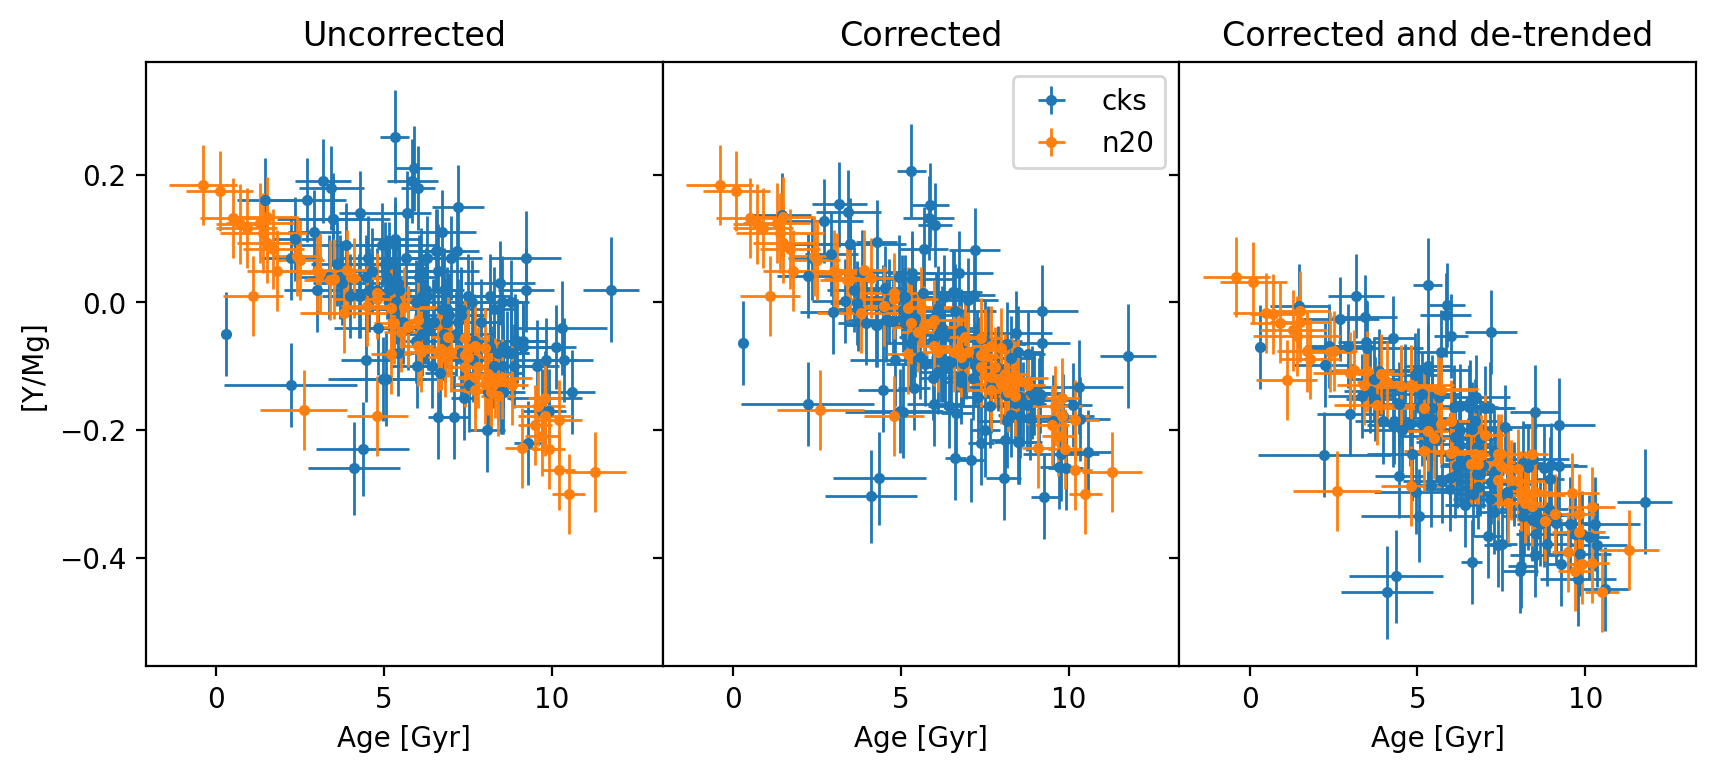

In [117]:
fig,ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10,4))

eb_kws = {"alpha":1, "fmt":".", "lw":1}

for ref in np.unique(data["flag"]):
    arg = data["flag"] == ref
    #Uncorrected
    ax[0].errorbar(data["age"][arg], data["ymg"][arg], 
                   xerr=data["e_age"][arg], 
                   yerr=map_soln["sigma"][arg], 
                   label=ref, **eb_kws)
    #Corrected
    ax[1].errorbar(data["age"][arg], data["ymg"][arg]-map_soln["cks_trend"][arg], 
                   xerr=data["e_age"][arg], 
                   yerr=map_soln["sigma"][arg], 
                   label=ref, **eb_kws)
    
    #Corrected and de-trended
    ax[2].errorbar(data["age"][arg], data["ymg"][arg]-map_soln["cks_trend"][arg]-map_soln["others"][arg], 
                   xerr=data["e_age"][arg], 
                   yerr=map_soln["sigma"][arg], 
                   label=ref, **eb_kws)

    
    

ax[0].set_title('Uncorrected')
ax[1].set_title('Corrected')
ax[2].set_title('Corrected and de-trended')
ax[1].legend()    


for i in range(3):
    ax[i].set_xlabel('Age [Gyr]')

ax[0].set_ylabel('[Y/Mg]')

plt.subplots_adjust(wspace=0)
plt.show()

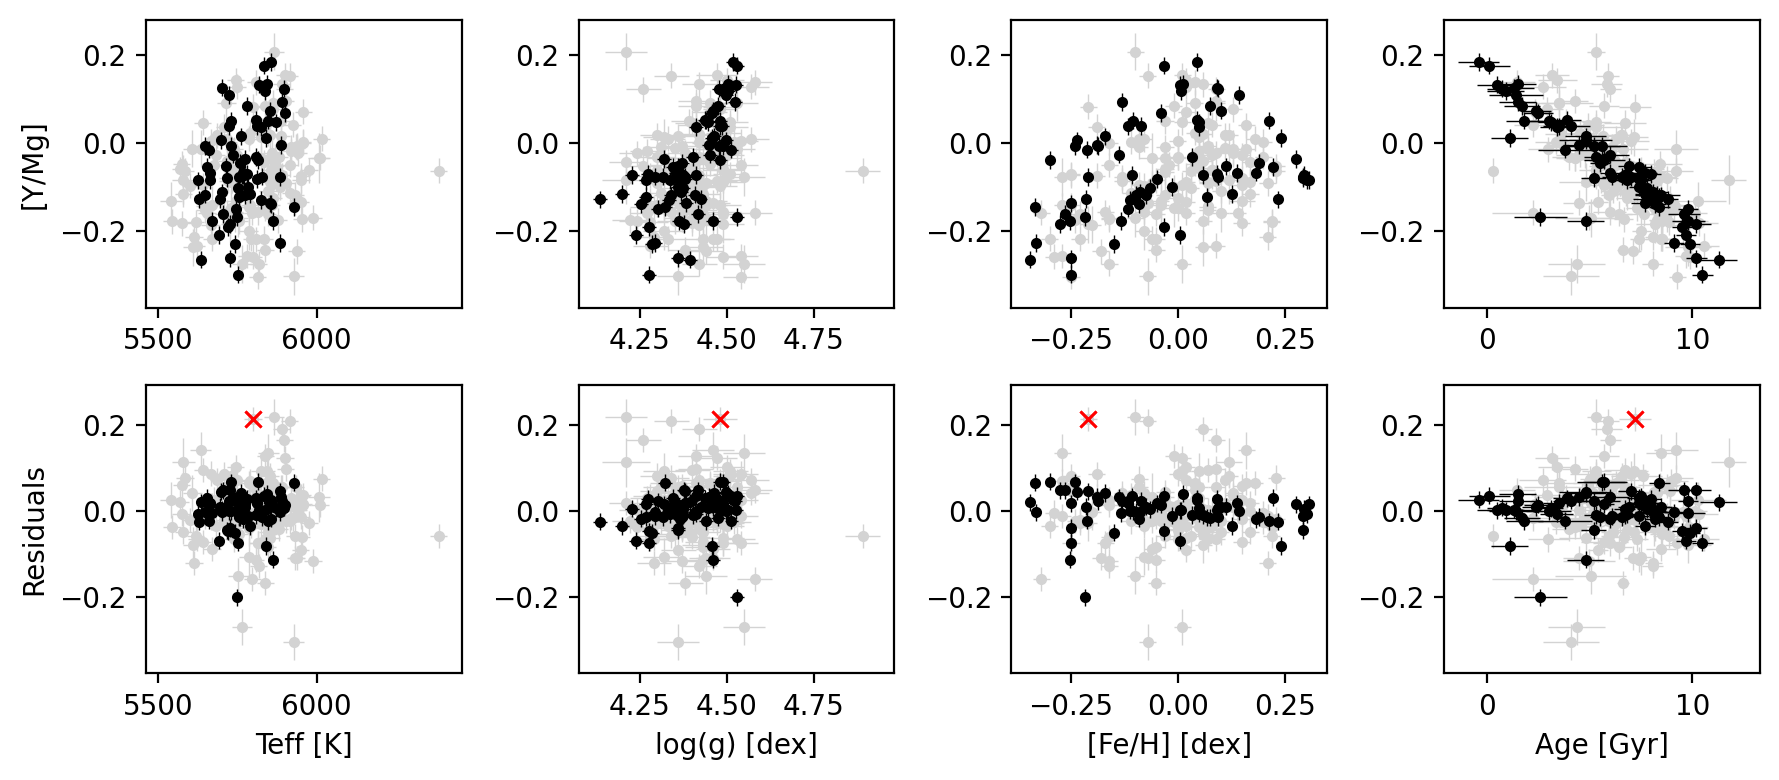

In [118]:
variables = ["teff","logg","feh","age"]

resid = data["ymg"]-map_soln["ymodel"]
rms = np.sqrt(np.median(resid ** 2))
outliers = abs(resid)/rms > 6

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=4,figsize=(9,4))

for i,v in enumerate(variables):
    ax2[i].plot(data[v][outliers], data["ymg"][outliers]-map_soln["cks_trend"][outliers]-(map_soln["ymodel"][outliers]), 'rx')
    ax2[i].plot(data[v][outliers], data["ymg"][outliers]-map_soln["cks_trend"][outliers]-(map_soln["ymodel"][outliers]), 'rx')
    
    for ref in np.unique(data["flag"]):
        arg = data["flag"]==ref

        if ref=='cks':

            ax1[i].errorbar(data[v][arg], data["ymg"][arg]-map_soln["cks_trend"][arg], xerr=data["e_"+v][arg], yerr=data["e_ymg"][arg], fmt='.', zorder=0, color='lightgrey', lw=0.5)
            ax2[i].errorbar(data[v][arg], data["ymg"][arg]-map_soln["cks_trend"][arg]-(map_soln["ymodel"][arg]), xerr=data["e_"+v][arg], yerr=data["e_ymg"][arg], fmt='.', zorder=0, color='lightgrey', lw=0.5)
            
               
        else:

            ax1[i].errorbar(data[v][arg], data["ymg"][arg], xerr=data["e_"+v][arg], yerr=data["e_ymg"][arg], fmt='.', zorder=1, color='k', lw=0.5)
            ax2[i].errorbar(data[v][arg], data["ymg"][arg]-(map_soln["ymodel"][arg]), xerr=data["e_"+v][arg], yerr=data["e_ymg"][arg], fmt='.', zorder=1, color='k', lw=0.5)
            
            
            
            
            
        #ax1[i].plot(data[v][np.argsort(data[v])], map_soln[v+"_trend"][np.argsort(data[v])], c='r')
    
ax1[0].set_ylabel("[Y/Mg]")
ax2[0].set_ylabel("Residuals")
ax2[0].set_xlabel("Teff [K]")
ax2[1].set_xlabel("log(g) [dex]")
ax2[2].set_xlabel("[Fe/H] [dex]")
ax2[3].set_xlabel("Age [Gyr]")
plt.tight_layout()

In [ ]:
#2021-09-09 DFM standup meeting:
# true age parameter: ymodel is fn of true age - leads to posteriors for each star
# cross validation on solar twins - leave out some solar twins, re-run procedure
# could add offset to solar twins and see if the offset is recovered - 
# mimicking CKS sample w/ left out solar twins
# background model could be broad model in abundance - could use pymc3 mixture distribution

# normal: y model - mean, other would be broad gaussian in abundance space - because outliers would be driving intrinsic scatter
# Send DFM the solar twin data

In [ ]:
#2021-09-10 Hogg
#How well does age predict each different abundance
#Information theory: age from a proxy, maximize information theory

#You also wouldn't use the input abundances as features becasue they're noisy. 
#Find latent surface that explains all of the data
#Every measurement you have is some noisy approximation of the truth...so you wouldn't do linear regression to predict isochrone ages. 
#You would fit a linear model that explains all of the data symmetrically
#Relationships between abundance and age
#Radial migration...

#Two variables that are correlated. both measured noisily. How you fit a line depends on the ratios of those errors. We're in that regime.
#Always do fit that age is a fn. of abundance - because it's easier to deal with noise on the dependent variable. If errors are very asymmetric, it's obvious how to do the problem.
#As soon as errors become comparable it is more complicated. 

#Does raw data that delivered the ages show breaks at 10 Gyr. Plot deviation from 10 Gyr isochrone.

#Make a model that is strictly linear with abundances. 
#Try to make the schmage have minimum scatter relative to the published ages.
#Only ask the published ages to be correct in their ordering of the stars. 
#Here's a linear combination of abundances that is monotonically related to ages. 
#And here's a subset. If you think so and so ages are correct, apply this non-linear correction and you'll get ages on that scale.

#What's the simplest abundance combination that is basically age.
#Schmages will be way more precise.

#Basic linear regression as an initialization. 
#Do individual 15 abundances to translate age. 16d surface. An initialization for the problem.
#Then ask how flexible do we want to be for the schmage to connect to age. Look at old school rank statistics. 
#Start at initial condition Optimize a rank statistic.
#Plot age vs. schmage colored by relative abundance ratios. 
#Gradients across the age-schmage relation would help make teh relation better. 
#Produce a slightly better model that describes that curve as well. 
#Create a generative model that generates everything and fit that model. 
#With a generative model you could include any data that you like. 
#You just compare it to the model where you happen to have the observations.
#Structure the generative model such that age is a latent parameter and you only generate abundances. Pull age through and abundances get generated.

#Everything to H or something well measured, or everything to Fe
#Mg/H and everything to Mg
#Objective function that isn't just a rank statistic. Something that stops it from blowing up. 
#Something like also asking the mean age to remain the same.
#Or more specific: the range of ages and the scatter of ages is the same. (difference in means squared and difference in variances squared)